## Blurring the Lines between Tourism and Terrorism in Western Europe

Shirley Liao -- Data Bootcamp Final Project -- Spring 2018

### Introduction

This project will explore the relationship between tourism and terrorism within Western Europe. In the past several years, developed countries have seen an increase in the number of terrorist attacks, especially in big cities, that have caught worldwide attention. With the popularity of online media and news outlets, almost everyone has accesss to information on terrorism and terrorist activities, and could possibly inherit widespread paranoia from these events. From firsthand accounts, hearing about these violent events have discouraged some people from visiting the region, although this would not be an accurate judgment of all people. Because of this, I would like to utilize a more legitimate and accurate tool, Python, to discover if these word of mouth comments hold some weight to a greater conversation on the perception of violence, safety and future trends of tourism.

My final goal is to provide an idea on **if** terrorism is related to tourism, not necessarily proving that there is a direct relationship between the two variables. The project is to simply manipulate the data, and any conclusion is based solely on the given information below. If there is any relationship this is not to say that there is a cause and effect; finding no relationship is entirely possible as well. 

### Methodology

In executing this project, information on two main datasets will have to be extracted:

Data on terrorism was extracted from the [Global Terrorism Database (GTD)](https://www.start.umd.edu/gtd/). This is the only comprehensive database on all recorded terrorist activities in every country starting from 1970. According to GTD, a terrorist attack is considered an intentional violent attack from subnational actor(s) in order to attain political, social, religious, or economic goals. State-sponsored terrorism is not included in this overview. Victims are considered any person(s), specified group of person(s), institutions, government, business, private and public properties. Important factors to consider are the country names, region, year, and individual event ids. The GTD website provides the data only in form of excel files, which have to be downloaded given a valid e-mail address, preferably from an academic institution. 


Data on international tourism was extracted from a [database](https://data.worldbank.org/indicator/ST.INT.ARVL?end=2016&locations=CA&start=2005) at [The World Bank](http://www.worldbank.org/), which covers various other statistical information by country and development priority. The organization has amassed a library of development knowledge through data-driven research. Tourism rates for this particular database are calculated by the number of internationl arrivals into each country per year. Data is obtained through the World Bank's API.

The relevant data on terrorism came in two excel files; the first file records all terrorist attacks from 1995-2012 and the second file that covers years 2013-2016. Both would need to be concatenated, and stripped down to the country, region, year, and event id. Using this information, the six countries in Western Europe that have had the most terrorist attacks will be used to observe their rates of change in terrorism and tourism from 2005 to 2016. 

Main sections will include: 

- Cross referencing the number of tourists and number of terrorist attacks over a 12 year period. The countries that are being investigated will be those in Western Europe, that have had the highest number of terrorist attacks in the past decade and a half. 
- Measuring growth rates by calculating increasing or decreasing quantities of tourists and attacks.
- In visualizing the data, necessary graphs will include comparing rates of change and finding their regressions.

Important variables:

- Country Name
- Year
- Region
- Event Id
- Change in number of tourists (percentage and rate)
- Change in number of terrorist attacks (percentage and rate)

#### Access to Data Cleaning 

In [136]:
import pandas as pd   # to create dataframes
import matplotlib.pyplot as plt   # to plot graphs
import numpy as np   # for numerical calculations
import wbdata   # to extract data from World Bank
import seaborn as sns    # to plot regression charts
from linearmodels.panel import PanelOLS  # for regression analysis

%matplotlib inline

--------------------------------------------------------------

#### Terrorism Data: Cleaning and Finding Rate of Change

There are two files extracted straight from GTD. Since these files are too large to upload directly, they had to be split into five smaller files and uploaded independently. These files are uploaded to GitHub, which then are extracted. They will all be concatenated into one large dataframe. There are 135 different columns for each file, for which this project only requires four: country name, year, eventid, and region. 

In [107]:
ta_1 = "https://raw.githubusercontent.com/sl4655/Data_Bootcamp_Final_Project/master/GTD_05to09.csv"

df_ta_1 = pd.read_csv(ta_1, low_memory=False)

df_ta_1.head()

# this is the data set that covers all attacks from 2005 to 2009

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.010000e+11,2005,1,1,NaN,0,NaN,95,Iraq,10,...,NaN,British Security Guards Killed in Suicide Atta...,"""Four Americans Killed in Baghdad Car Blast,” ...","""Three British Civilians Killed in Attacks in ...",CETIS,-9,-9,1,1,NaN
1,2.010000e+11,2005,1,1,NaN,1,NaN,159,Peru,3,...,"The outcome of hostage situation was unknown, ...",Peruvian Troops Launched Assault on Rebel-Held...,"Rebel Group Holds Three Policemen Hostage,” Ra...",“At Least Four Police Officers Killed in Shoot...,CETIS,0,0,0,0,NaN
2,2.010000e+11,2005,1,1,NaN,0,NaN,45,Colombia,3,...,"The mayor of Tame, Alfredo Guzman Tafur, said ...","""FARC Rebels Kill Seventeen People in Tame, Ar...",NaN,NaN,CETIS,0,0,0,0,NaN
3,2.010000e+11,2005,1,1,NaN,0,NaN,28,Bosnia-Herzegovina,9,...,NaN,"""Girl Wounded in Bosnian Serb Republic Grenade...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
4,2.010000e+11,2005,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Militants Trigger Blast in Kashmir’s Anantnag...","Kashmir Official, Nine Policemen Hurt in Blast...",NaN,CETIS,-9,-9,0,-9,NaN


In [108]:
ta_2 = "https://raw.githubusercontent.com/sl4655/Data_Bootcamp_Final_Project/master/GTD_10to12.csv"

df_ta_2 = pd.read_csv(ta_2, low_memory=False)

df_ta_2.head()

# this is the data of all attacks from 2010 to 2012

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.010000e+11,2010,1,1,NaN,0,NaN,4,Afghanistan,6,...,The available sources listed the fatalities fo...,"Press TV, ""In Afghanistan, Roadside Bomb Attac...","Amir Shah and Jim Heintz, ""More Civilian Death...","Pajhwok Afghan News, ""Five Private Security Co...",ISVG,0,0,0,0,NaN
1,2.010000e+11,2010,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"Jane’s Intelligence, “Pro-Taliban Militants De...","South Asia Terrorism Portal, “Eight Militants ...","Daily Times, ""Six, Including Tribal Elder, Kil...",ISVG,0,0,0,0,NaN
2,2.010000e+11,2010,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"Raza Hassan, Dawn, “Three Held for Involvement...","The Pakistan Newswire, ""Police Claims Averting...","BBC Monitoring South Asia, ""Karachi Police Rec...",ISVG,-9,-9,0,-9,NaN
3,2.010000e+11,2010,1,1,NaN,0,NaN,153,Pakistan,6,...,This was one of three related attacks (cf. 201...,"Press TV, “Militants Raze More Schools in Nort...","Dawn, “Health Unit, Two Schools Dynamited in B...","Agence France Presse, ""Militants Blow up Schoo...",ISVG,-9,-9,0,-9,"201001010005, 201001010006, 201001010007"
4,2.010000e+11,2010,1,1,NaN,0,NaN,153,Pakistan,6,...,This was one of three related attacks (cf. 201...,"Press TV, “Militants Raze More Schools in Nort...","Dawn, “Health Unit, Two Schools Dynamited in B...","Agence France Presse, ""Militants Blow up Schoo...",ISVG,-9,-9,0,-9,"201001010006, 201001010005, 201001010007"


In [109]:
ta_3 = "https://raw.githubusercontent.com/sl4655/Data_Bootcamp_Final_Project/master/GTD_13to14.csv"

df_ta_3 = pd.read_csv(ta_3, low_memory=False)

df_ta_3.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010003, 201301010002"
3,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9,NaN
4,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,0,0,0,0,NaN


In [110]:
ta_4 = "https://raw.githubusercontent.com/sl4655/Data_Bootcamp_Final_Project/master/GTD_14to15.csv"

df_ta_4 = pd.read_csv(ta_4, low_memory=False)

df_ta_4.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.014040e+11,2014,4,24,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Suicide attack in Iraq kills at least 11 ...","""25 killed in attacks in Iraq,"" Xinhua Gen...","""Iraq: Roundup of Security Incidents 22-28 Apr...",START Primary Collection,0,1,0,1,NaN
1,2.014040e+11,2014,4,24,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this attack represent a d...,"""20 persons wounded in Kirkuk,"" Aswat al Iraq,...","""Iraq: Roundup of Security Incidents 22-28 Apr...","""/12/ Civilians wounded by a car bomb in Kirku...",START Primary Collection,-9,-9,0,-9,NaN
2,2.014040e+11,2014,4,24,NaN,0,NaN,228,Yemen,10,...,NaN,"""Yemen: Roundup of Security Incidents 25 April...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
3,2.014040e+11,2014,4,24,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Roundup of Security Incidents 22-28 Apr...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
4,2.014040e+11,2014,4,24,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""25 killed in attacks in Iraq,"" Xinhua Gen...","""Iraq: Roundup of Security Incidents 22-28 Apr...","""One civilian killed, and two others wounded, ...",START Primary Collection,-9,-9,0,-9,NaN


In [111]:
ta_5 = "https://raw.githubusercontent.com/sl4655/Data_Bootcamp_Final_Project/master/GTD_15to16.csv"

df_ta_5 = pd.read_csv(ta_5, low_memory=False)

df_ta_5.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.015060e+11,2015,6,21,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Roundup of Security Incidents 16-22 Jun...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,2.015060e+11,2015,6,21,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Roundup of Security Incidents 16-22 Jun...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
2,2.015060e+11,2015,6,21,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""21/06 20:46 - Bomb attacks near Iraqi capital...","""Iraq: Roundup of Security Incidents 16-22 Jun...","""Bomb attacks near Iraqi capital kill 5, injur...",START Primary Collection,-9,-9,0,-9,NaN
3,2.015060e+11,2015,6,21,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Roundup of Security Incidents 16-22 Jun...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
4,2.015060e+11,2015,6,21,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""21/06 20:46 - Bomb attacks near Iraqi capital...","""Iraq: Roundup of Security Incidents 16-22 Jun...","""Bomb attacks near Iraqi capital kill 5, injur...",START Primary Collection,-9,-9,0,-9,NaN


In [112]:
df_ta = pd.concat([df_ta_1, df_ta_2, df_ta_3, df_ta_4, df_ta_5])

df_ta.head()

# I am combining the two data sets, one on top of another to make one larger one

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.010000e+11,2005,1,1,NaN,0,NaN,95,Iraq,10,...,NaN,British Security Guards Killed in Suicide Atta...,"""Four Americans Killed in Baghdad Car Blast,” ...","""Three British Civilians Killed in Attacks in ...",CETIS,-9,-9,1,1,NaN
1,2.010000e+11,2005,1,1,NaN,1,NaN,159,Peru,3,...,"The outcome of hostage situation was unknown, ...",Peruvian Troops Launched Assault on Rebel-Held...,"Rebel Group Holds Three Policemen Hostage,” Ra...",“At Least Four Police Officers Killed in Shoot...,CETIS,0,0,0,0,NaN
2,2.010000e+11,2005,1,1,NaN,0,NaN,45,Colombia,3,...,"The mayor of Tame, Alfredo Guzman Tafur, said ...","""FARC Rebels Kill Seventeen People in Tame, Ar...",NaN,NaN,CETIS,0,0,0,0,NaN
3,2.010000e+11,2005,1,1,NaN,0,NaN,28,Bosnia-Herzegovina,9,...,NaN,"""Girl Wounded in Bosnian Serb Republic Grenade...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
4,2.010000e+11,2005,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Militants Trigger Blast in Kashmir’s Anantnag...","Kashmir Official, Nine Policemen Hurt in Blast...",NaN,CETIS,-9,-9,0,-9,NaN


In [113]:
df_ta.set_index(['iyear'], inplace = True)

# I am setting the index to year as it is also the common index in the World Bank tourism data. 

In [114]:
world= df_ta.loc[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], ['country_txt', 'region_txt', 'eventid']]

# these are the years I want to look at (2005 - 2016), as well as the relevant tags: the country name, the regions, and the specific attack id. 

world.head()

,country_txt,region_txt,eventid
iyear,,,
2005,Iraq,Middle East & North Africa,2.010000e+11
2005,Peru,South America,2.010000e+11
2005,Colombia,South America,2.010000e+11
2005,Bosnia-Herzegovina,Eastern Europe,2.010000e+11
2005,India,South Asia,2.010000e+11


In [115]:
we = world.loc[world['region_txt'] == "Western Europe"]

# more specifically, I want to look at countries in Western Europe

we.head(10)

,country_txt,region_txt,eventid
iyear,,,
2005,United Kingdom,Western Europe,2.010000e+11
2005,France,Western Europe,2.010000e+11
2005,Greece,Western Europe,2.010000e+11
2005,Sweden,Western Europe,2.010000e+11
2005,Spain,Western Europe,2.010000e+11
2005,France,Western Europe,2.010000e+11
2005,France,Western Europe,2.010000e+11
2005,Spain,Western Europe,2.010000e+11
2005,Spain,Western Europe,2.010000e+11


In [116]:
new = we.groupby(["iyear", "country_txt"])[['eventid']].count()

# Using the groupby and count method,I want to calculate the number of terrorist attacks by grouping them into year and specific country.

display(new.head(10))

eventid
iyear country_txt            
2005  France               33
      Germany               3
      Greece                6
      Italy                 6
      Spain                24
      Sweden                3
      United Kingdom       25
2006  Austria               1
      France               34
      Germany               4

In [117]:
we_ta = new.unstack(fill_value=0.0).sum(level=1, axis=1)

# this is important for organization, and to replace any NaN with 0.0.  

we_ta.sum().sort_values(ascending=False).head(6)

# I want to find the six countries in Western Europe with the highest rates of terrorist activities.

country_txt
United Kingdom    728.0
Greece            435.0
France            269.0
Germany           148.0
Ireland           147.0
Spain             133.0
dtype: float64

Once we have found how the top six countries in Western Europe that have most terrorist activity, this data becomes critical to comparing their rates of changes over time.

In [118]:
we_ta.columns.set_names(['Country Name'], inplace=True)
we_ta.index.set_names(['Year'], inplace=True)

# this is to replace column and index labels with more appropriate titles that matches with WB data

ta_final = we_ta[['France', 'Germany', 'Greece', 'Ireland', 'Spain', 'United Kingdom']]

# here I am narrowing down the countries to just these six countries that I will look at

ta_final

Country Name,France,Germany,Greece,Ireland,Spain,United Kingdom
Year,,,,,,
2005,33.0,3.0,6.0,0.0,24.0,25.0
2006,34.0,4.0,23.0,1.0,23.0,6.0
2007,16.0,3.0,15.0,1.0,11.0,20.0
2008,13.0,3.0,53.0,5.0,37.0,39.0
2009,9.0,4.0,115.0,0.0,21.0,22.0
2010,3.0,1.0,49.0,4.0,3.0,57.0
2011,8.0,8.0,11.0,4.0,0.0,47.0
2012,65.0,4.0,22.0,29.0,1.0,54.0
2013,12.0,0.0,53.0,27.0,5.0,137.0


In [119]:
ta_rate = ta_final.pct_change(periods=1)
ta_rate.replace(np.inf, 0, inplace=True)

# I want to find the percent change of terrorist attacks for each country after every year
# all values that come out as NaN and inf will be replaced by 0

ta_rate

Country Name,France,Germany,Greece,Ireland,Spain,United Kingdom
Year,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.030303,0.333333,2.833333,0.000000,-0.041667,-0.760000
2007,-0.529412,-0.250000,-0.347826,0.000000,-0.521739,2.333333
2008,-0.187500,0.000000,2.533333,4.000000,2.363636,0.950000
2009,-0.307692,0.333333,1.169811,-1.000000,-0.432432,-0.435897
2010,-0.666667,-0.750000,-0.573913,0.000000,-0.857143,1.590909
2011,1.666667,7.000000,-0.775510,0.000000,-1.000000,-0.175439
2012,7.125000,-0.500000,1.000000,6.250000,0.000000,0.148936
2013,-0.815385,-1.000000,1.409091,-0.068966,4.000000,1.537037


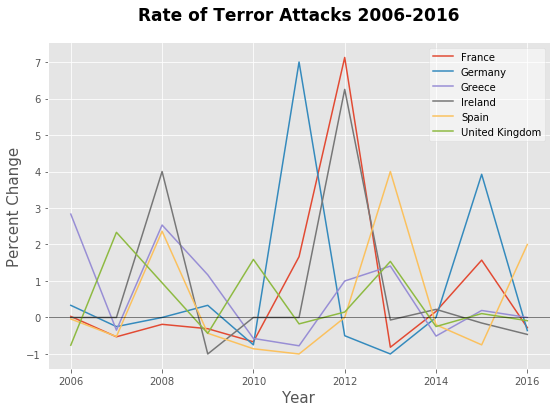

In [160]:
ta_plot = ta_rate.plot(
    figsize = (9,6)
)

# plotting terror attack rates of change on a line graph

ta_plot.spines['right'].set_visible(False)
ta_plot.spines['top'].set_visible(False)
ta_plot.spines['bottom'].set_visible(False)

# I prefer graphs with no spines on top, right, and when there are negative y values, to have the bottom spine off as well. 

ta_plot.axhline(y=0, color='black', linewidth=0.5)

# I also prefer the graph to include a horizontal line to indicate y=0

ta_plot.set_title('Rate of Terror Attacks 2006-2016', fontsize=17, fontweight='bold', y=1.05)

ta_plot.set_xlabel('Year', fontsize=15)
ta_plot.set_ylabel('Percent Change', fontsize=15)

ta_plot.legend(framealpha=0.5, facecolor='white')

# I prefer the legend to be translucent to the background


Finding the percentage rate is important to finding how terrorism has increased or decreased for each country. From this graph, it seems that France, Germany, and Ireland have seen dramatic increases between 2010 to 2012. However from just this graph there are no valid conclusions or trends to be made. Whether Western Europe has experienced a noticeable rise in terrorism during a particular period time cannot be determined. Each country seems to have their own moments of increased terrorist activity that is independent from other countries.

----------------------------------------------------------------------------------------------------------------------------

#### Tourism Data: Cleaning and Finding Rates of Change

Data on tourism is grabbed from the World Bank. I am grabbing data from the six same countries specifically from the database that provides statistical information on international arrivals. 

In [121]:
data_date = (datetime.datetime(2005, 1, 1), datetime.datetime(2016, 1, 1))
tourist = wbdata.get_dataframe({'ST.INT.ARVL':'values'},country=("GBR", "FRA", "ESP", "IRL", "DEU", "GRC"), data_date=data_date)

# tourism data is grabbed from the World Bank Database, and information on the aforementioned six countries will be examined

tourist.head(10)

values
country date            
Germany 2016  35555000.0
        2015  34970000.0
        2014  32999000.0
        2013  31545000.0
        2012  30411000.0
        2011  28374000.0
        2010  26875000.0
        2009  24220000.0
        2008  24884000.0
        2007  24421000.0

In [122]:
tourist_final = tourist.unstack().T

tourist_final.reset_index(drop=True, level=0, inplace=True)

tourist_final.columns.set_names(['Country Name'], inplace=True)

tourist_final.index.set_names(['Year'], inplace =True)

# these steps will organize the data; the values column on top is dropped and the indenx and column labels are slightly changed. 

tourist_final

Country Name,France,Germany,Greece,Ireland,Spain,United Kingdom
Year,,,,,,
2005,74988000.0,21500000.0,14765000.0,7333000.0,55914000.0,28039000.0
2006,77916000.0,23569000.0,16039000.0,8001000.0,58004000.0,30654000.0
2007,80853000.0,24421000.0,16165000.0,8332000.0,58666000.0,30870000.0
2008,79218000.0,24884000.0,15939000.0,8026000.0,57192000.0,30142000.0
2009,76764000.0,24220000.0,14915000.0,7189000.0,52178000.0,28199000.0
2010,76647000.0,26875000.0,15007000.0,7134000.0,52677000.0,28295000.0
2011,80499000.0,28374000.0,16427000.0,7630000.0,56177000.0,29306000.0
2012,81980000.0,30411000.0,15518000.0,7550000.0,57464000.0,29282000.0
2013,83634000.0,31545000.0,17920000.0,8260000.0,60675000.0,31063000.0


In [123]:
tourist_rate = tourist_final.pct_change(periods=1)

# I also want to find the percentage change for tourism; index type is changed to integer

tourist_rate

Country Name,France,Germany,Greece,Ireland,Spain,United Kingdom
Year,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.039046,0.096233,0.086285,0.091095,0.037379,0.093263
2007,0.037694,0.036149,0.007856,0.041370,0.011413,0.007046
2008,-0.020222,0.018959,-0.013981,-0.036726,-0.025125,-0.023583
2009,-0.030978,-0.026684,-0.064245,-0.104286,-0.087670,-0.064462
2010,-0.001524,0.109620,0.006168,-0.007651,0.009563,0.003404
2011,0.050256,0.055777,0.094623,0.069526,0.066443,0.035731
2012,0.018398,0.071791,-0.055336,-0.010485,0.022910,-0.000819
2013,0.020176,0.037289,0.154788,0.094040,0.055878,0.060822


In [124]:
tourist_rate.T

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,
France,NaN,0.039046,0.037694,-0.020222,-0.030978,-0.001524,0.050256,0.018398,0.020176,0.000801,0.008972,-0.022285
Germany,NaN,0.096233,0.036149,0.018959,-0.026684,0.109620,0.055777,0.071791,0.037289,0.046093,0.059729,0.016729
Greece,NaN,0.086285,0.007856,-0.013981,-0.064245,0.006168,0.094623,-0.055336,0.154788,0.229520,0.071075,0.050850
Ireland,NaN,0.091095,0.041370,-0.036726,-0.104286,-0.007651,0.069526,-0.010485,0.094040,0.066949,0.081130,0.060034
Spain,NaN,0.037379,0.011413,-0.025125,-0.087670,0.009563,0.066443,0.022910,0.055878,0.070276,0.049831,0.104730
United Kingdom,NaN,0.093263,0.007046,-0.023583,-0.064462,0.003404,0.035731,-0.000819,0.060822,0.049899,0.055898,0.040016


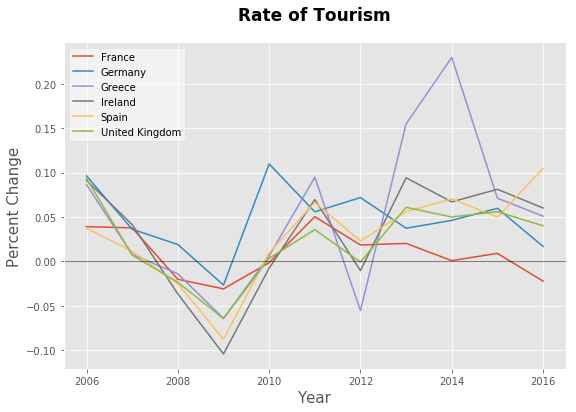

In [161]:
tourist_plot = tourist_rate.plot(
                figsize= (9,6)
                )
# line graph for tourism rates of change

#instructions are similar to previous graph

tourist_plot.spines['right'].set_visible(False)
tourist_plot.spines['top'].set_visible(False)
tourist_plot.spines['bottom'].set_visible(False)

tourist_plot.axhline(y=0, color='black', linewidth=0.5)

tourist_plot.xaxis.set_ticks_position('bottom')

tourist_plot.set_title('Rate of Tourism', fontsize=17, fontweight='bold', y=1.05)

tourist_plot.set_xlabel('Year', fontsize=15)
tourist_plot.set_ylabel('Percent Change', fontsize=15)

tourist_plot.legend(framealpha=0.5, facecolor='white')

Similar to the previous graph above, the line plot focuses on the percentage change for rates of tourism. There are some general trends observed in this graph; all countries have experienced a dramatic decrease in tourism around 2008, and a slight drop in 2011. Nothing can be concluded for certain, but there is a more noticeable pattern for rates in tourism than terrorism.

-----------------------------------------------------------------------------------------

#### Combining the Data

Terrorism and tourism percentage change data will be concantenated. This final dataframe will be used for most of the data analysis. Several graphs will be created to visualize at once relationship and regression.

In [126]:
tourist_rate.index = tourist_rate.index.astype(int)

ta_rate.index = ta_rate.index.astype(int)

# index for both datasets are changed to integer for concatenation

In [127]:
type(tourist_rate.index)

pandas.core.indexes.numeric.Int64Index

In [128]:
type(ta_rate.index)

pandas.core.indexes.numeric.Int64Index

In [129]:
pct_rate = pd.concat([ta_rate, tourist_rate], keys=['tourist_rate', 'attack_rate'], axis=1).fillna(value=0)

# data of on rates of change for terrorism and tourism is concatenated, columns labels on level=0 are added

pct_rate

tourist_rate                                          \
Country Name       France   Germany    Greece   Ireland     Spain   
Year                                                                
2005             0.000000  0.000000  0.000000  0.000000  0.000000   
2006             0.030303  0.333333  2.833333  0.000000 -0.041667   
2007            -0.529412 -0.250000 -0.347826  0.000000 -0.521739   
2008            -0.187500  0.000000  2.533333  4.000000  2.363636   
2009            -0.307692  0.333333  1.169811 -1.000000 -0.432432   
2010            -0.666667 -0.750000 -0.573913  0.000000 -0.857143   
2011             1.666667  7.000000 -0.775510  0.000000 -1.000000   
2012             7.125000 -0.500000  1.000000  6.250000  0.000000   
2013            -0.815385 -1.000000  1.409091 -0.068966  4.000000   
2014             0.166667  0.000000 -0.509434  0.222222 -0.200000   
2015             1.571429  3.923077  0.192308 -0.151515 -0.750000   
2016            -0.277778 -0.359375  0.000000 -0.464286  2.000000   

                            attack_rate                                \
Country Name United Kingdom      France   Germany    Greece   Ireland   
Year                                                                    
2005               0.000000    0.000000  0.000000  0.000000  0.000000   
2006              -0.760000    0.039046  0.096233  0.086285  0.091095   
2007               2.333333    0.037694  0.036149  0.007856  0.041370   
2008               0.950000   -0.020222  0.018959 -0.013981 -0.036726   
2009              -0.435897   -0.030978 -0.026684 -0.064245 -0.104286   
2010               1.590909   -0.001524  0.109620  0.006168 -0.007651   
2011              -0.175439    0.050256  0.055777  0.094623  0.069526   
2012               0.148936    0.018398  0.071791 -0.055336 -0.010485   
2013               1.537037    0.020176  0.037289  0.154788  0.094040   
2014              -0.248175    0.000801  0.046093  0.229520  0.066949   
2015               0.106796    0.008972  0.059729  0.071075  0.081130   
2016              -0.087719   -0.022285  0.016729  0.050850  0.060034   

                                       
Country Name     Spain United Kingdom  
Year                                   
2005          0.000000       0.000000  
2006          0.037379       0.093263  
2007          0.011413       0.007046  
2008         -0.025125      -0.023583  
2009         -0.087670      -0.064462  
2010          0.009563       0.003404  
2011          0.066443       0.035731  
2012          0.022910      -0.000819  
2013          0.055878       0.060822  
2014          0.070276       0.049899  
2015          0.049831       0.055898  
2016          0.104730       0.040016

This graph provides the complete data on rates of change for both tourism and terrorism from 2005 to 2016. This dataframe will be used to provide further graphic visualization side by side as well as a regression model. 

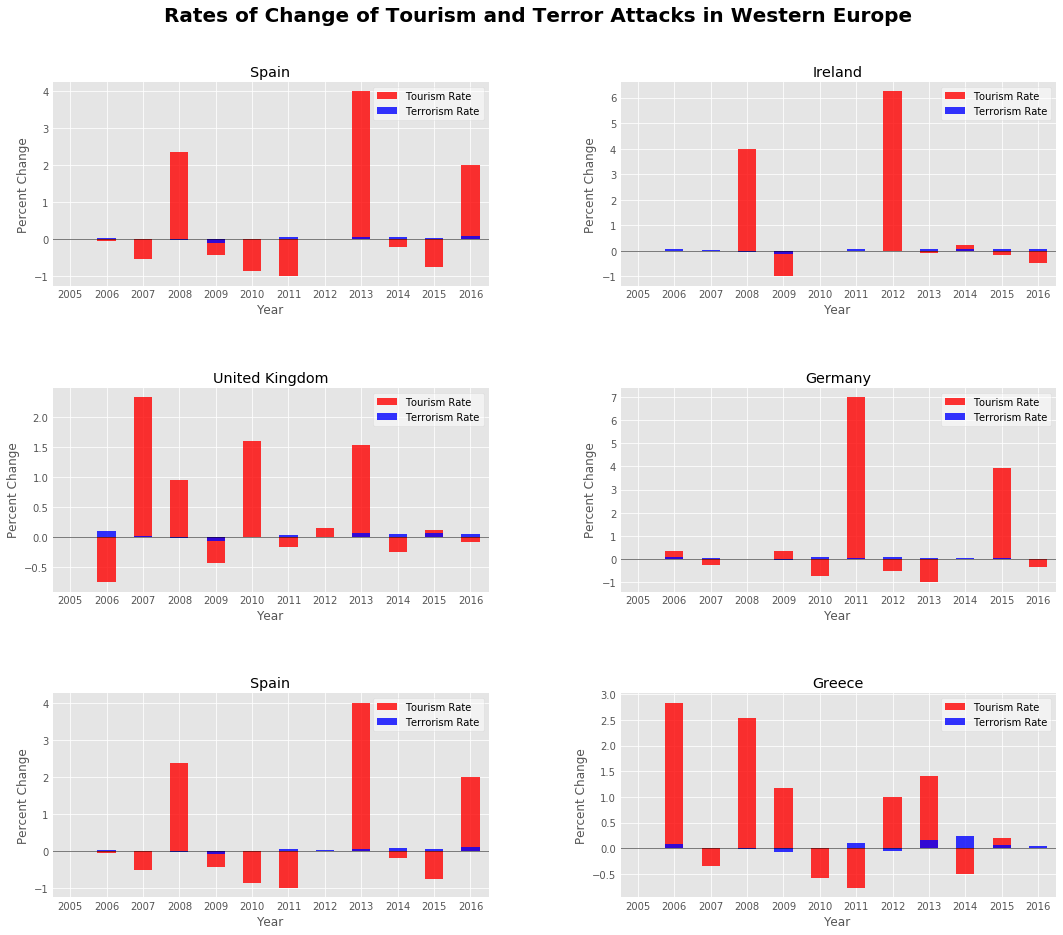

In [163]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(18,15)) 
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Rates of Change of Tourism and Terror Attacks in Western Europe', fontsize=20, y=.95, fontweight = 'bold')

# 6 stacked bar charts are created for each country to express percentage rates in relation to the tourism and terrorism variables

pct_rate['tourist_rate', 'Spain'].plot(kind='bar', color='red', ax=ax[0,0], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'Spain'].plot(kind='bar', color='blue', ax=ax[0,0], alpha=0.8, label='Terrorism Rate')
ax[0,0].set_title('Spain')
ax[0,0].set_ylabel('Percent Change')
ax[0,0].set_xlabel('Year')
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].axhline(y=0, color='black', linewidth=0.5)
ax[0,0].legend(framealpha=0.5, facecolor='white')
ax[0,0].tick_params(axis='both', which='both',length=0, rotation='default')

# ticks are off for both axis
# y=0 line is apparent


pct_rate['tourist_rate', 'United Kingdom'].plot(kind='bar', color='red', ax=ax[1,0], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'United Kingdom'].plot(kind='bar', color='blue', ax=ax[1,0], alpha=0.8, label='Terrorism Rate')
ax[1,0].set_title('United Kingdom')
ax[1,0].set_ylabel('Percent Change')
ax[1,0].set_xlabel('Year')
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['bottom'].set_visible(False)
ax[1,0].axhline(y=0, color='black', linewidth=0.5)
ax[1,0].legend(framealpha=0.5, facecolor='white')
ax[1,0].tick_params(axis='both', which='both',length=0, rotation='default')

pct_rate['tourist_rate', 'Germany'].plot(kind='bar', color='red', ax=ax[1,1], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'Germany'].plot(kind='bar', color='blue', ax=ax[1,1], alpha=0.8, label='Terrorism Rate')
ax[1,1].set_title('Germany')
ax[1,1].set_ylabel('Percent Change')
ax[1,1].set_xlabel('Year')
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)
ax[1,1].axhline(y=0, color='black', linewidth=0.5)
ax[1,1].legend(framealpha=0.5, facecolor='white')
ax[1,1].tick_params(axis='both', which='both',length=0, rotation='default')

pct_rate['tourist_rate', 'Ireland'].plot(kind='bar', color='red', ax=ax[0,1], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'Ireland'].plot(kind='bar', color='blue', ax=ax[0,1], alpha=0.8, label='Terrorism Rate')
ax[0,1].set_title('Ireland')
ax[0,1].set_ylabel('Percent Change')
ax[0,1].set_xlabel('Year')
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].axhline(y=0, color='black', linewidth=0.5)
ax[0,1].legend(framealpha=0.5, facecolor='white')
ax[0,1].tick_params(axis='both', which='both',length=0, rotation='default')

pct_rate['tourist_rate', 'Spain'].plot(kind='bar', color='red', ax=ax[2,0], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'Spain'].plot(kind='bar', color='blue', ax=ax[2,0], alpha=0.8, label='Terrorism Rate')
ax[2,0].set_title('Spain')
ax[2,0].set_ylabel('Percent Change')
ax[2,0].set_xlabel('Year')
ax[2,0].spines['right'].set_visible(False)
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['bottom'].set_visible(False)
ax[2,0].axhline(y=0, color='black', linewidth=0.5)
ax[2,0].legend(framealpha=0.5, facecolor='white')
ax[2,0].tick_params(axis='both', which='both',length=0, rotation='default')

pct_rate['tourist_rate', 'Greece'].plot(kind='bar', color='red', ax=ax[2,1], alpha=0.8, label='Tourism Rate')
pct_rate['attack_rate', 'Greece'].plot(kind='bar', color='blue', ax=ax[2,1], alpha=0.8, label='Terrorism Rate')
ax[2,1].set_title('Greece')
ax[2,1].set_ylabel('Percent Change')
ax[2,1].set_xlabel('Year')
ax[2,1].spines['right'].set_visible(False)
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['bottom'].set_visible(False)
ax[2,1].axhline(y=0, color='black', linewidth=0.5)
ax[2,1].legend(framealpha=0.5, facecolor='white')
ax[2,1].tick_params(axis='both', which='both',length=0, rotation='default')


Here, a 3 by 2 figure with subplots is congregated by stack bar charts for percentage rates of each country. Again there does not seem to be any noticeable patterns just from observation. However it is obvious that tourism rates experience greater fluxuation than terrorism rates in all countries. It is normal to tourism to see a 2 or greater percent in change, but but terrorism rates often see less than 0.5 percent in change. 

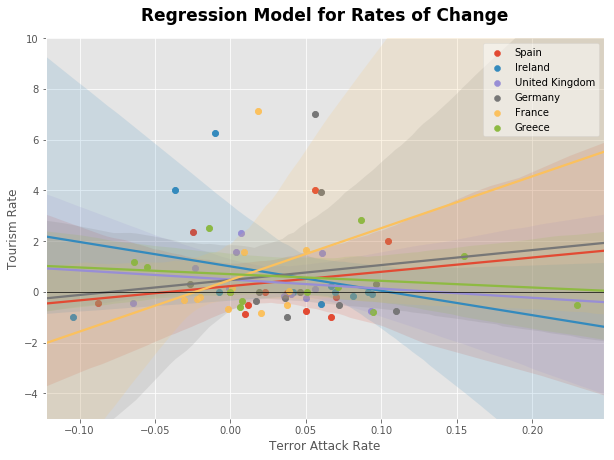

In [166]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('Regression Model for Rates of Change', fontsize=17, y=1.03, fontweight='bold')

# regression scatter plot for rate of change of each country

ax.set_ylim(-5,10)
ax.set_xlabel('Attack Rate')
ax.set_ylabel('Tourist Rate')

ax.scatter(y=pct_rate.tourist_rate.Spain, x=pct_rate.attack_rate.Spain)
ax.scatter(y=pct_rate.tourist_rate.Ireland, x=pct_rate.attack_rate.Ireland)
ax.scatter(y=pct_rate.tourist_rate['United Kingdom'], x=pct_rate.attack_rate['United Kingdom'])
ax.scatter(y=pct_rate.tourist_rate.Germany, x=pct_rate.attack_rate.Germany)
ax.scatter(y=pct_rate.tourist_rate.France, x=pct_rate.attack_rate.France)
ax.scatter(y=pct_rate.tourist_rate.Greece, x=pct_rate.attack_rate.Greece)

sns.regplot(y=pct_rate.tourist_rate.Spain, x=pct_rate.attack_rate.Spain)
sns.regplot(y=pct_rate.tourist_rate.Ireland, x=pct_rate.attack_rate.Ireland)
sns.regplot(y=pct_rate.tourist_rate['United Kingdom'], x=pct_rate.attack_rate['United Kingdom'])
sns.regplot(y=pct_rate.tourist_rate.Germany, x=pct_rate.attack_rate.Germany)
sns.regplot(y=pct_rate.tourist_rate.France, x=pct_rate.attack_rate.France)
sns.regplot(y=pct_rate.tourist_rate.Greece, x=pct_rate.attack_rate.Greece)

ax.axhline(y=0, color='black', linewidth=0.7)

ax.set(xlabel='Terror Attack Rate', ylabel='Tourism Rate')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend(framealpha=0.5, facecolor='white')

This regression graph shows the relationship between terror attack rate and tourism rate, and if possibly there is a relationship between these two variables. Just from observation, there seems to be no relationship between the independent and dependent variable that are consistent with all the countries. France has the strongest positive relationship, while Ireland has the strongest negative relationship. The rest of the countries have slight positive and negative relationships. The verdict is evenly split on whether there is a definitive positive/negative relationship overall.

Below are summaries of each countries' regression results:

##### Ireland

In [138]:
x = pct_rate.attack_rate.Ireland # x will be the independent variable, or rate of terrorist activity
y = pct_rate.tourist_rate.Ireland # y will be the dependent variable or rate of tourism
x = sm.add_constant(X) # an x-intercept will be added

model = sm.OLS(y,x).fit() 
## sm.OLS(output, input)

predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ireland   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                    0.1526
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.704
Time:                        22:33:21   Log-Likelihood:                -25.489
No. Observations:                  12   AIC:                             54.98
Df Residuals:                      10   BIC:                             55.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8683      0.729      1.192      0.261      -0.755       2.492
Spain         -5.1693     13.231     -0.391      0.704     -34.650      24.312
==============================================================================
Omnibus:                       14.096   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.573
Skew:                           1.783   Prob(JB):                       0.0138
Kurtosis:                       5.103   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### France

In [139]:
x = pct_rate.attack_rate.France 
y = pct_rate.tourist_rate.France 
x = sm.add_constant(X) 

model = sm.OLS(y, x).fit() 
predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 France   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                   0.07550
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.789
Time:                        22:33:24   Log-Likelihood:                -25.849
No. Observations:                  12   AIC:                             55.70
Df Residuals:                      10   BIC:                             56.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5494      0.751      0.732      0.481      -1.123       2.222
Spain          3.7462     13.634      0.275      0.789     -26.631      34.124
==============================================================================
Omnibus:                       25.109   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.657
Skew:                           2.428   Prob(JB):                     7.29e-06
Kurtosis:                       7.872   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Germany

In [140]:
x = pct_rate.attack_rate.Germany 
y = pct_rate.tourist_rate.Germany 
x = sm.add_constant(X) 

model = sm.OLS(y, x).fit() 
predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Germany   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.5584
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.472
Time:                        22:33:26   Log-Likelihood:                -26.384
No. Observations:                  12   AIC:                             56.77
Df Residuals:                      10   BIC:                             57.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4473      0.785      0.570      0.581      -1.302       2.196
Spain         10.6528     14.256      0.747      0.472     -21.111      42.416
==============================================================================
Omnibus:                       12.061   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.837
Skew:                           1.637   Prob(JB):                       0.0328
Kurtosis:                       4.719   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### United Kingdom

In [101]:
x = pct_rate.attack_rate['United Kingdom'] 
y = pct_rate.tourist_rate['United Kingdom'] 
x = sm.add_constant(X) 


model = sm.OLS(y, x).fit() 
predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         United Kingdom   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                   0.07632
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.788
Time:                        22:18:53   Log-Likelihood:                -15.942
No. Observations:                  12   AIC:                             35.88
Df Residuals:                      10   BIC:                             36.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4567      0.329      1.389      0.195      -0.276       1.189
Spain         -1.6497      5.971     -0.276      0.788     -14.955      11.656
==============================================================================
Omnibus:                        1.888   Durbin-Watson:                   2.700
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.319
Skew:                           0.748   Prob(JB):                        0.517
Kurtosis:                       2.368   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Greece

In [102]:
x = pct_rate.attack_rate.Greece 
y = pct_rate.tourist_rate.Greece 
x = sm.add_constant(X) 

model = sm.OLS(y, x).fit() 
predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Greece   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.297
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.281
Time:                        22:19:17   Log-Likelihood:                -18.076
No. Observations:                  12   AIC:                             40.15
Df Residuals:                      10   BIC:                             41.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7913      0.393      2.014      0.072      -0.084       1.666
Spain         -8.1236      7.133     -1.139      0.281     -24.017       7.770
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   2.700
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.407
Skew:                           0.804   Prob(JB):                        0.495
Kurtosis:                       2.524   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Spain

In [103]:
x = pct_rate.attack_rate.Spain 
y = pct_rate.tourist_rate.Spain 
x = sm.add_constant(X) 

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

C:\Users\Shirley Liao\Anaconda3\Anaconda Python\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Spain   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.3448
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.570
Time:                        22:19:48   Log-Likelihood:                -21.612
No. Observations:                  12   AIC:                             47.22
Df Residuals:                      10   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2321      0.527      0.440      0.669      -0.943       1.407
Spain          5.6241      9.577      0.587      0.570     -15.716      26.964
==============================================================================
Omnibus:                        5.721   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.969
Skew:                           1.209   Prob(JB):                        0.227
Kurtosis:                       3.304   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion (Final Thoughts)

This goal of this project is to manipulate, analyze, and visualize the data on terrorism and tourism. At the core of the project, I wanted to know if general assumptions on terrorism and tourism based on media was true. 

Were there actually more terrorist activity in Western Europe in recent years than in the past few decades? Looking at general counts from each country, this is mixed. The UK, Ireland, and Germany there has seen a consistent increase. However for Greece and France there have been periods on fluxuation, and for Spain it has even seen a drop. What I looked at were their rates of change, which more importantly considers how rapidly terrorist activity have risen or declined in the last 12 years. Upon observing percentage changes, this provides even less of a clear trend. This is because there are generally small incremental changes each year, which in a small time span, does not really provide strong conclusions. 

Is tourism even affected by terrorism, and can we trust the data? In completing the project, I've noticed how influential large quantities are in observing change. Obviously (and thankfully), tourism data works with greater numbers, and as a result, countries experience more dramatic rates of change per year. But there are also really mixed results, with some countries experiencing dramatic increases and decreases in some years, while in others, sees almost no change in the amount of tourists. Other factors can also be at play for these change, and they can't be discounted. Recessions, politics, and other trends in tourism needs to be factored in also. Overall tourism in Western Europe is quite consistent if you look at quantity, but rates of change are more striking. The region on its own is a hotspot for tourism.

There is no conclusive result on whether terrorism affects tourism. More in-depth research is necessary to find if there is a definitive relationship. Nonetheless it is satisfying enough in preparing this data to see how each country has change over time through these variables. 